# 安裝適當的IBM Qiskit Package (IBM Qiskit v1.2)
安裝IBM Qiskit 1.2版時若出現「重新啟動工作階段」警告，這是正常的訊息，只要按下「重新啟動工作階段」按鈕即可順利安裝IBM Qiskit 1.2版。

In [1]:
!pip install qiskit[visualization]==1.2
!pip install qiskit-aer

## 特殊量子糾纏態

以下的範例程式進一步使用H閘搭配CNOT閘來產生一個特殊的量子糾纏態 -- 貝爾態(Bell state):

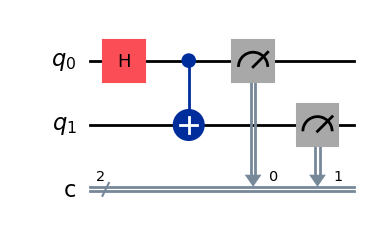

In [2]:
#Program 4.6a
from qiskit import QuantumCircuit
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.measure(range(2),range(2))
display(qc.draw('mpl'))

上列的程式碼說明如下:
* 第1行為程式編號註解。
* 第2行使用import敘述引入qiskit套件中的QuantumCircuit類別。
* 第3行使用QuantumCircuit(2,2)建構一個包含2個量子位元及2個古典位元的量子線路物件，儲存於qc變數中。
* 第4行使用qc.h(0)呼叫QuantumCircuit類別的h方法，將量子線路中索引值為0的量子位元進行H閘運算。
* 第5行使用qc.cx(0,1)呼叫QuantumCircuit類別的cx方法，建立CNOT閘，並以索引值為0的量子位元為控制位元，以索引值為1的量子位元為目標位元。
* 第6行使用qc.measure(range(2),range(2))呼叫QuantumCircuit類別的measure方法。因為range(2)為[0,1]串列，所以這個方法會在索引值為0及1的量子位元加上測量操作，並將測量結果儲存於索引值為0及1的古典位元。
* 第7行使用qc.draw()呼叫QuantumCircuit類別的draw方法，其預設參數為'mpl'，代表透過matplotlib套件顯示量子線路。

Counts: {'11': 501, '00': 499}


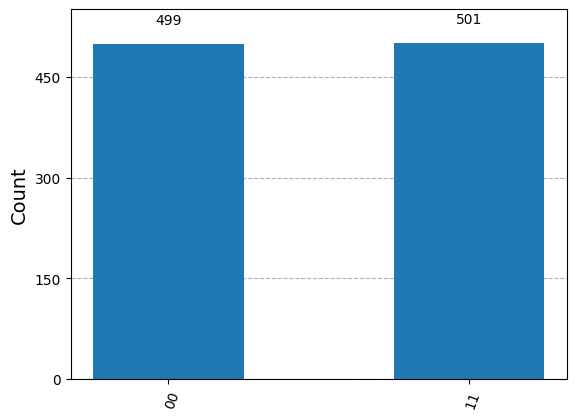

In [5]:
#Program 4.6b
from qiskit import transpile
from qiskit_aer import AerSimulator #for qiskit 1.0 or later
from qiskit.visualization import plot_histogram
backend = AerSimulator()
transpiled_circuit = transpile(qc, backend=backend)
job = backend.run(transpiled_circuit,shots = 1000)
result = job.result()
counts = result.get_counts()
print("Counts:",counts)
display(plot_histogram(counts))

上列的範例程式展示處於貝爾態$|\Phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$的2個量子位元的量子狀態測量結果，當一個量子位元被測量為$|1\rangle$的時候，另外一個量子位元必定(或說機率接近100%)被測量為$|1\rangle$；或是相反的，當一個量子位元被測量為$|0\rangle$的時候，另外一個量子位元必定被測量為$|0\rangle$。

$|\Phi^+\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$是一個雙量子位元的量子糾纏態，其中2個量子位元的狀態必定相同。以下的範例程式則展示處於貝爾態$|\Psi^+\rangle=\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$的2個量子位元的量子狀態測量結果: